In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [3]:
wdf = pd.read_csv('daily_dataset\jaipur.csv', parse_dates=['date_time'], index_col='date_time')
wdf.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,07:16 AM,...,11,17,1,49,0.0,1017,9,10,4,8
2009-01-01 01:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,07:16 AM,...,11,17,1,50,0.0,1017,9,10,3,8
2009-01-01 02:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,07:16 AM,...,10,18,1,51,0.0,1017,9,10,2,8
2009-01-01 03:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,07:16 AM,...,9,18,1,52,0.0,1017,8,10,1,9
2009-01-01 04:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,07:16 AM,...,11,15,1,49,0.0,1018,10,10,1,8


# Checking columns in our dataframe

In [4]:
wdf.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

## Now shape

# Checking is there any null values in dataset

In [5]:
wdf.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

In [14]:
wdf_num=wdf.loc[:,['maxtempC']]
wdf_num.head()

,maxtempC
date_time,
2009-01-01 00:00:00,24
2009-01-01 01:00:00,24
2009-01-01 02:00:00,24
2009-01-01 03:00:00,24
2009-01-01 04:00:00,24


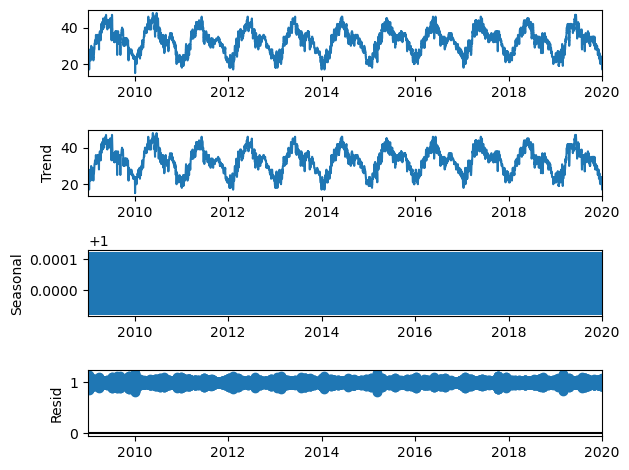

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
# India_AQI=final_df['India_AQI']
result=seasonal_decompose(wdf_num,model='multiplicative')
result.plot();

# Shape of new dataframe

In [7]:
wdf_num.shape

(96432, 1)

In [15]:
from prophet import Prophet

df=wdf_num.reset_index()
df.columns=['ds','y']

In [16]:
df

,ds,y
0,2009-01-01 00:00:00,24
1,2009-01-01 01:00:00,24
2,2009-01-01 02:00:00,24
3,2009-01-01 03:00:00,24
4,2009-01-01 04:00:00,24
...,...,...
96427,2020-01-01 19:00:00,19
96428,2020-01-01 20:00:00,19
96429,2020-01-01 21:00:00,19
96430,2020-01-01 22:00:00,19


# split the dataset into training and testing.

In [17]:
# split data 
train = df[df['ds'] < pd.Timestamp('2019-01-01')]
test = df[df['ds'] >= pd.Timestamp('2019-01-01')]

In [19]:
test.shape

(8784, 2)

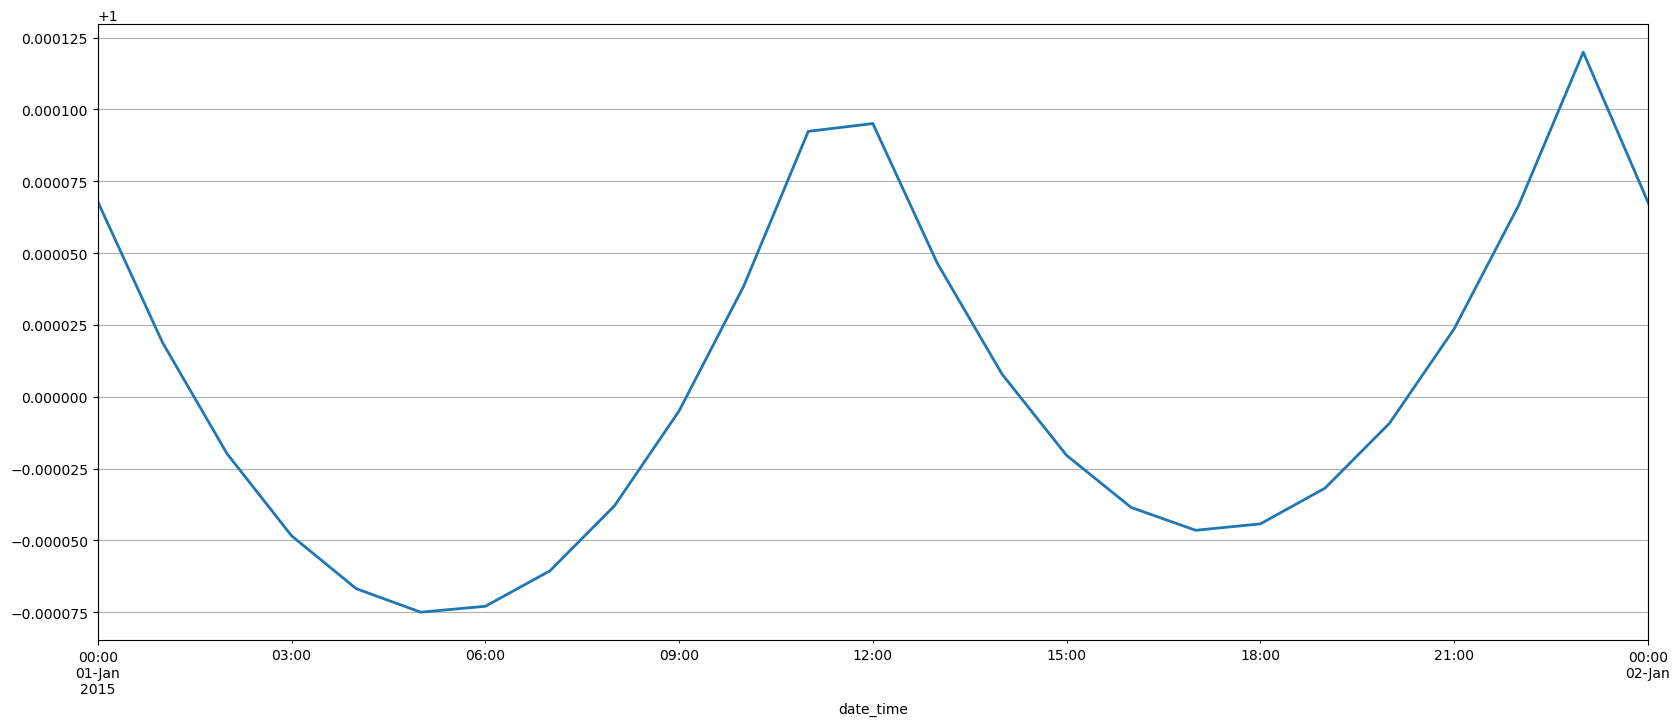

In [25]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2015-01-01','2015-01-02'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [42]:
from prophet import Prophet


#Formatting necessary to Prophet:
wdf_num=wdf_num.reset_index()
wdf_num.columns=['ds','y']
# Forming test/train data:
train=wdf_num[:-24*2]
test=wdf_num[-24*2:-12]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

07:16:19 - cmdstanpy - INFO - Chain [1] start processing
07:17:35 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

08:14:57 - cmdstanpy - INFO - Chain [1] start processing
08:15:47 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = m.make_future_dataframe(periods=12, freq = 'MS') 

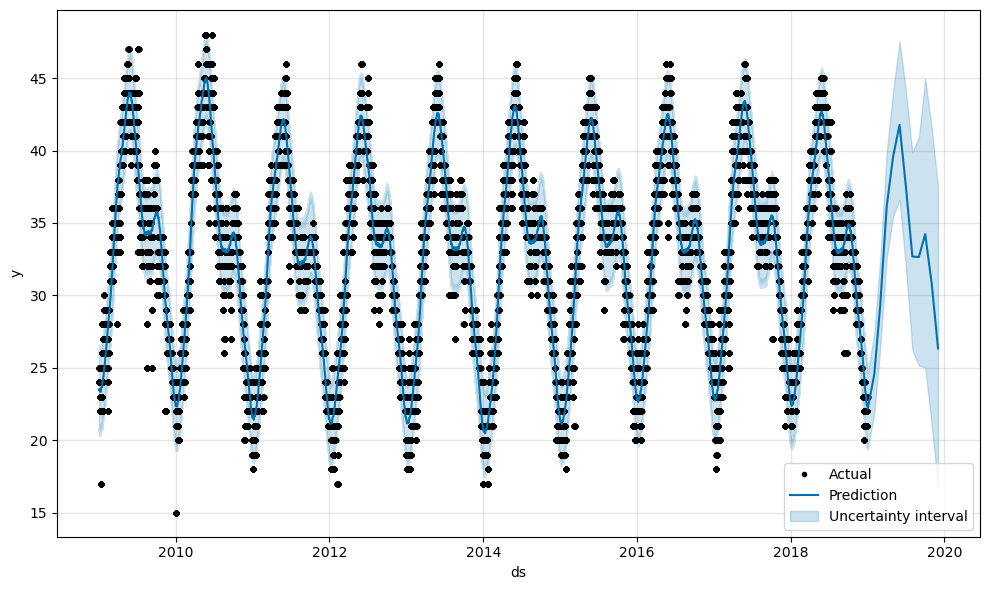

In [42]:
# future = m.make_future_dataframe(periods=12,freq = 'MS')
forecast = m.predict(future)
fig = m.plot(forecast)
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

In [36]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 3


In [37]:
predictions.mean()

32.83627979701294

In [33]:
test.mean()

y    32.52459
dtype: float64

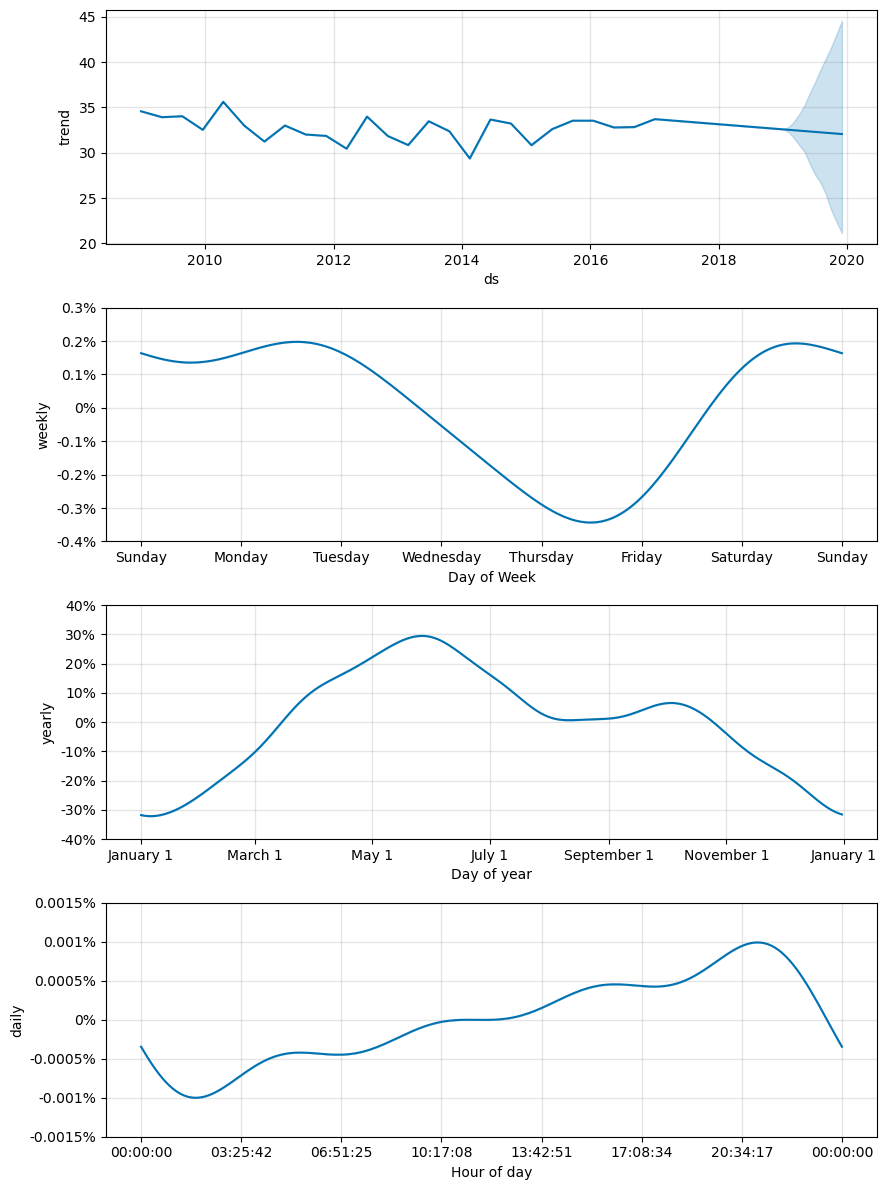

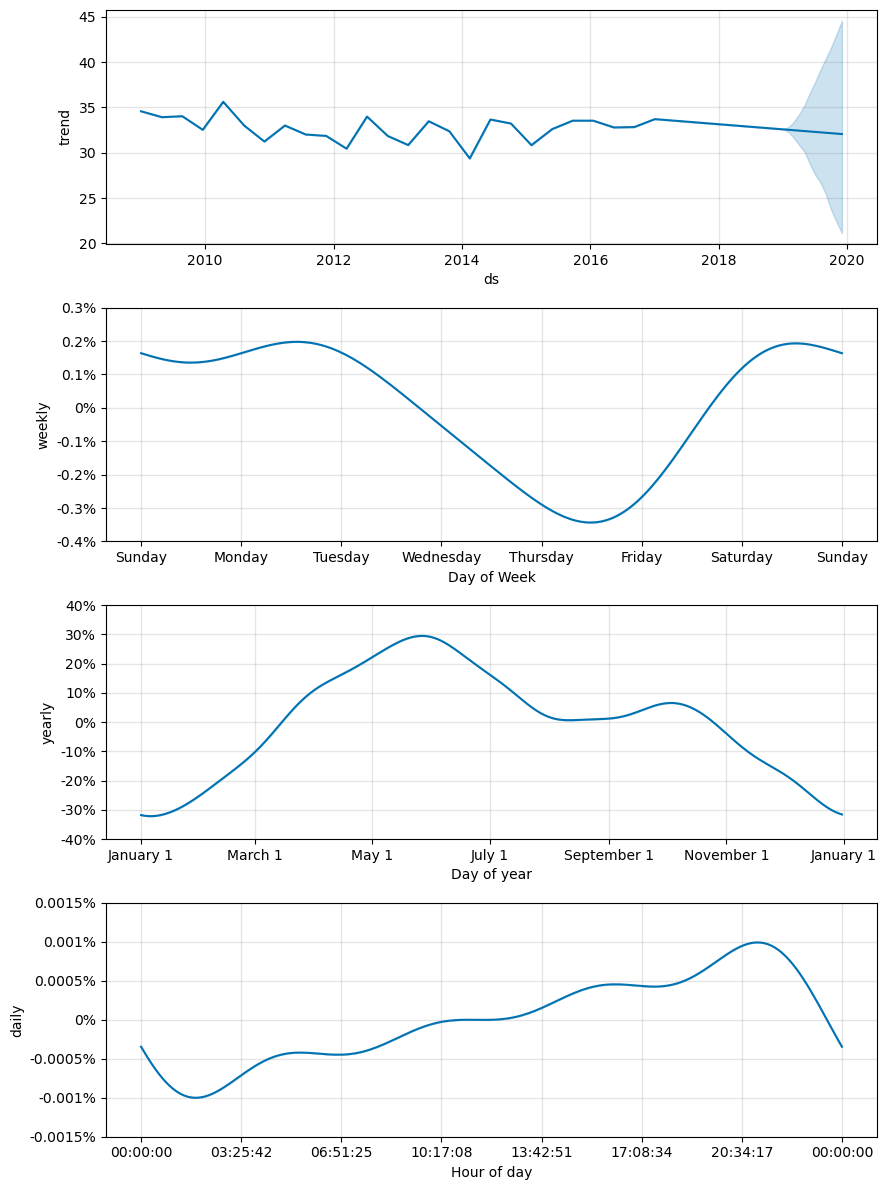

In [43]:
m.plot_components(forecast)